In [3]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv(url,header=None,names=col_names)

In [4]:
print(data.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [5]:
# 准备数据
feture_cols = ['pregnant','insulin','bmi','age',]
X = data[feture_cols]
y = data.label

In [6]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [7]:
# 线性回归模型
from sklearn.linear_model import LogisticRegression

log  = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred_class = log.predict(X_test)

In [9]:
# 评估
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred_class))

0.692708333333


### 零度（null accuracy）：无效的精度

In [10]:
print(y_test.value_counts())
print(max(y_test.mean(),1-y_test.mean()))

0    130
1     62
Name: label, dtype: int64
0.677083333333


### 结果矩阵
即实际结果的个数和预测结果的个数

In [11]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]


In [12]:
# 下面就是他们的意思（TP，NF，true，positive，false，negative）
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

### 计算精度

In [14]:
print((TN+TP)/(TN+TP+FP+FN))
print(metrics.accuracy_score(y_test,y_pred_class))

0.692708333333
0.692708333333


### 错误率

In [15]:
print((FN+FP)/(TN+TP+FP+FN))
print(1 - metrics.accuracy_score(y_test,y_pred_class))

0.307291666667
0.307291666667


### 召回率
当真实结果是真的，预测正确的概率，FN就是本来是假的，预测是真的，也就是预测的总共的真的个数

In [16]:
print(TP/(TP+FN))
print(metrics.recall_score(y_test,y_pred_class))

0.241935483871
0.241935483871


### 查准率

In [20]:
print(TP/(TP+FP))
print(metrics.precision_score(y_test,y_pred_class))

0.555555555556
0.555555555556


### 相对召回率

In [17]:
print(TN/(TN+FP))

0.907692307692


### 其他

In [19]:
print(FN/(FN+TP))
print(FP/(FP+TN))

0.758064516129
0.0923076923077


# 调整分类阀值

### 先看默认分类阀值
默认的概率是0.5

In [21]:
log.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [22]:
# 查看下前面10个预测的概率,第0列代表预测为0的概率
log.predict_proba(X_test)[0:10,:]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [25]:
# 预测为1
y_pred_prob = log.predict_proba(X_test)[:,1]

In [26]:
# 直方图显示
import matplotlib.pyplot as plt

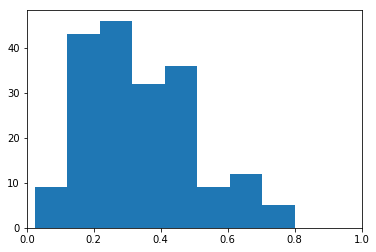

In [28]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.show()

## 减小阀值增加敏感度
比如减少到0.3，那么就有更多的人被判为有病

In [38]:
from sklearn.preprocessing import binarize

y_pred_prob = log.predict_proba(X_test)
y_pred_class = binarize(y_pred_prob,0.3)

In [41]:
# 再看看
print(y_pred_prob[0:10,1])
print(y_pred_class[0:10,1])

[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438]
[ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.]


In [45]:
#
print(metrics.confusion_matrix(y_test,y_pred_class[:,1]))

[[80 50]
 [16 46]]


In [46]:
# 敏感度增加
print(46/(46+16))

0.7419354838709677


In [47]:
# 专一度减少
print(80/(80+50))

0.6153846153846154


# ROC和AUC

### 绘制ROC曲线

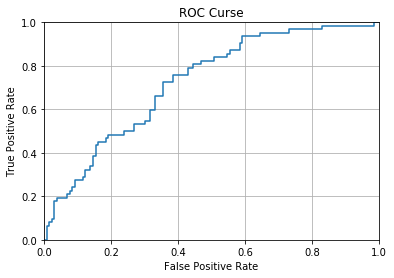

In [50]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curse')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

### 计算AUC

In [51]:
print(metrics.roc_auc_score(y_test,y_pred_prob[:,1]))

0.724565756824


In [52]:
from sklearn.cross_validation import cross_val_score

cross_val_score(log,X,y,cv=10,scoring='roc_auc').mean()

0.73782336182336183